<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 6. 비지도 학습
---


---
## 6-1. 군집 알고리즘
---

In [ ]:
# wget으로 파일을 가져올 수 있다.
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-09 14:12:00--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-09 14:12:01--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-09 14:12:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connect

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
# 300장의 이미지(사과/파인애플/바나나 각각 100장)
# 각 이미지는 100 x 100

fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

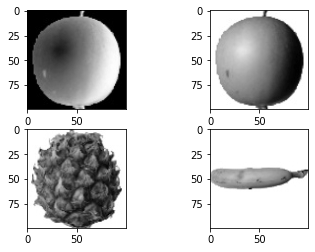

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(fruits[0], cmap='gray')  # 이미지는 반전되어 있음
axs[0, 1].imshow(fruits[0], cmap='gray_r')  # 반전을 다시 반전시킴
axs[1, 0].imshow(fruits[100], cmap='gray_r')  # 파인애플
axs[1, 1].imshow(fruits[200], cmap='gray_r')  # 버내너
plt.show()

(array([21., 21., 27., 11.,  9.,  4.,  5.,  0.,  1.,  1.]),
 array([18.568  , 24.79665, 31.0253 , 37.25395, 43.4826 , 49.71125,
        55.9399 , 62.16855, 68.3972 , 74.62585, 80.8545 ]),
 <a list of 10 Patch objects>)

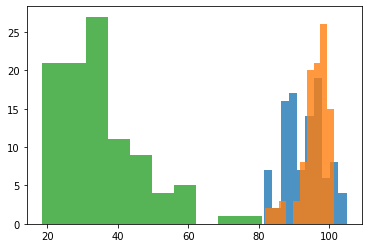

In [ ]:
# 과일별로 픽셀값의 평균을 내보자.
# 100 x 100 이미지를 펼쳐서 1 x 10000 ndarray로 바꿈
apple = fruits[0:100].reshape(-1, 100*100)  # shape (100, 10000)
pineapple = fruits[100:200].reshape(-1, 100*100)  # shape (100, 10000)
banana = fruits[200:300].reshape(-1, 100*100)  # shape (100, 10000)

# axis=1 방향으로 평균 내면 각 이미지당 평균값이 나옴
# 사과, 파인애플, 바나나의 이미지 평균 픽셀값의 분포를 보자
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

---
결과를 보면 바나나는 평균 픽셀값이 낮음. 바나나의 크기가 작기 때문.

사과랑 파인애플은 히스토그램만으로는 구별이 잘 안됨

사과의 모든 이미지를 평균한 것과 파인애플을 모두 평균한 것을 비교해보자.

---

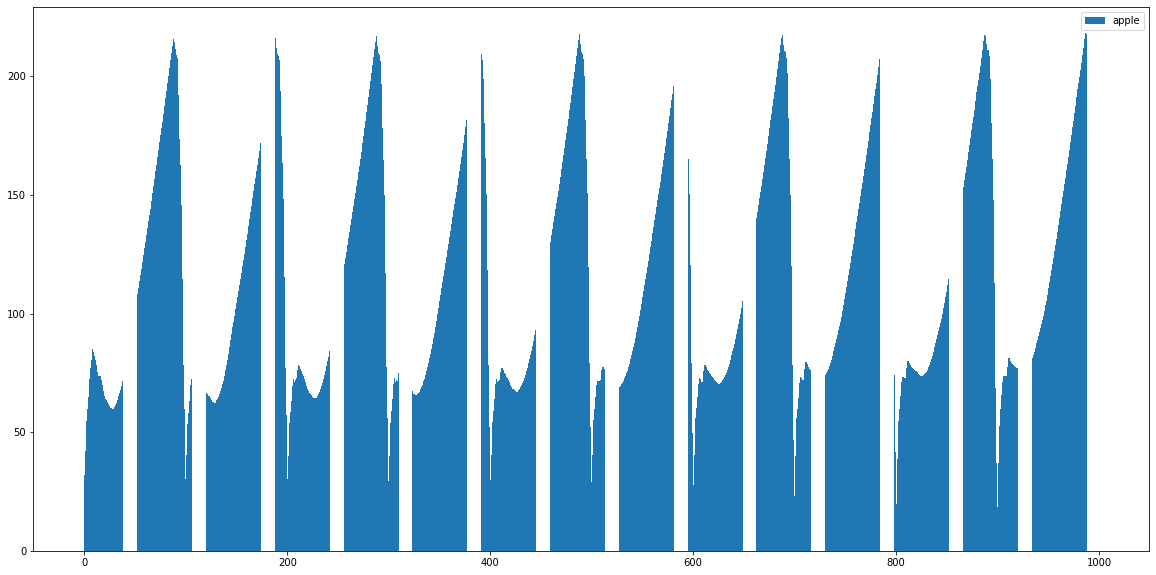

In [ ]:
# axis=0 방향으로 평균 내면 각 픽셀당 평균값이 나옴
# 사과, 파인애플, 바나나의 평균 이미지를 그려보자
# fig, axs = plt.subplots(1, 3, figsize=(20, 5))
# axs[0].bar(range(10000), np.mean(apple, axis=0), label='apple')
# axs[1].bar(range(10000), np.mean(pineapple, axis=0), label='pineapple')
# axs[2].bar(range(10000), np.mean(banana, axis=0), label='banana')
# plt.show()

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.bar(range(1000), np.mean(apple[:, 4500:5500], axis=0), label='apple')
plt.legend()
plt.show()



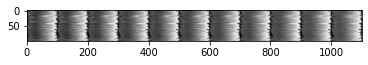

<BarContainer object of 1100 artists>

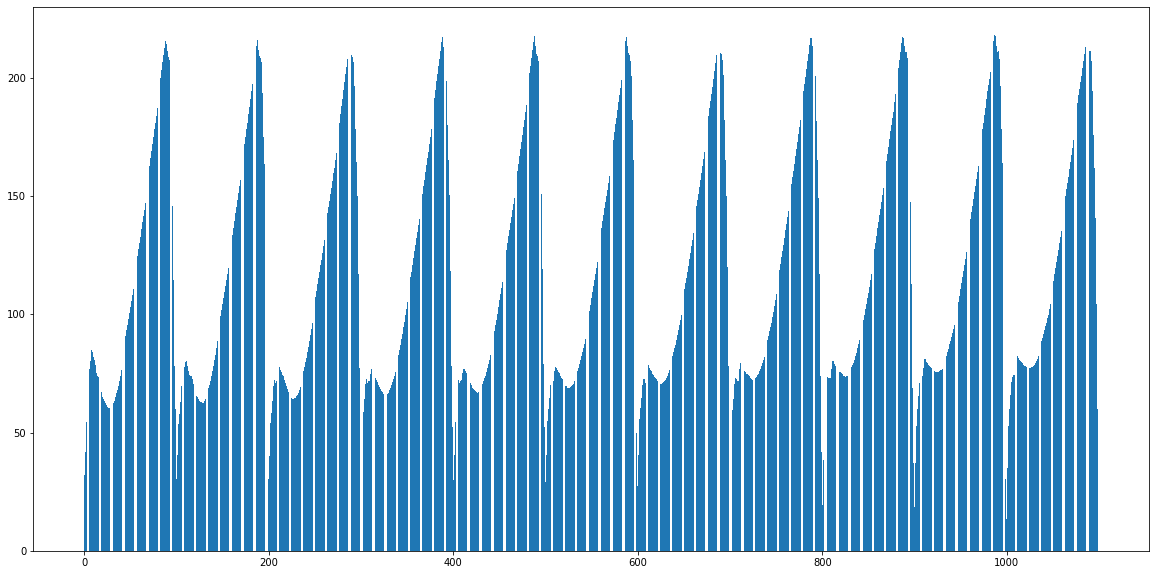

In [52]:
pmin = 4500
pmax = 5600

plt.imshow(apple[:, pmin:pmax], cmap='gray')
plt.show()
# print(np.mean(apple[:, pmin:pmax], axis=0))

fig, axs = plt.subplots(1, 1, figsize=(20, 10))
axs.bar(range(pmax-pmin), (np.mean(apple[:, pmin:pmax], axis=0)))

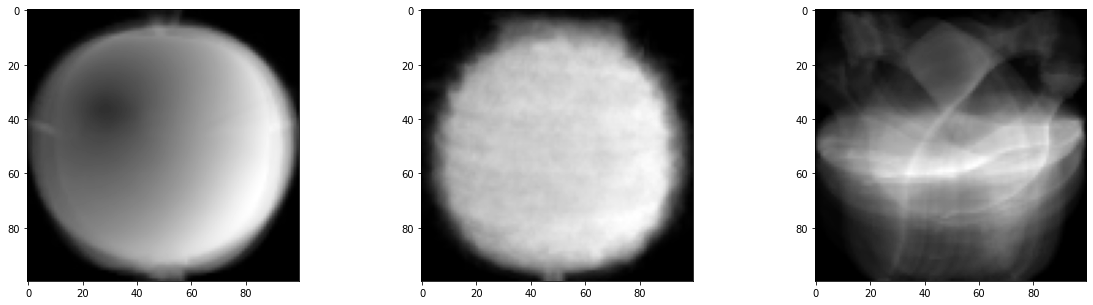

In [56]:
# 각 과일별로 평균 이미지를 그려보자
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray')
axs[1].imshow(pineapple_mean, cmap='gray')
axs[2].imshow(banana_mean, cmap='gray')
plt.show()

---

특징이 보인다.

사과: 위치별로 밝기 차이가 있음

파인애플: 밝기가 고름

바나나: 밝은 영역이 적음

---